In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def show_images(images, titles, save_as=False):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    if save_as:  # If a filename is provided, save the figure
        plt.savefig(save_as, bbox_inches='tight', dpi=300)
    plt.show()

In [4]:
# image_path    = "./../img/coins.jpg"  
image_path    = "./../img/coins_redmi_3.jpeg"  # got all except 2 correct
# image_path    = "./../img/one_redmi.jpg"
# # image_path  = "./../img/two_redmi.jpg"
# # image_path  = "./../img/three_redmi.jpg"
# image_path    = "./../img/four_redmi.jpg"
# # image_path  = "./../img/five_redmi.jpg"

# A. Detect All coins in the Image

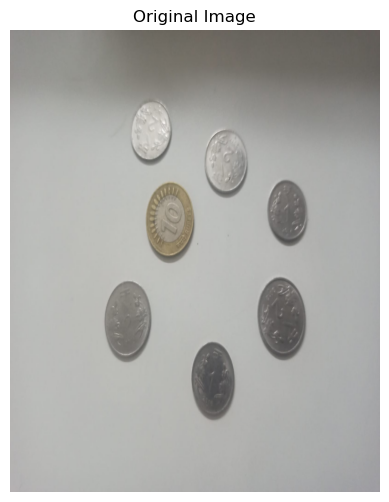

In [5]:
# Load and resize the image
img = cv2.imread(image_path)
img = cv2.resize(img, (720, 900))
image_copy = img.copy()

# Show original image
show_images([cv2.cvtColor(img, cv2.COLOR_BGR2RGB)], ["Original Image"])

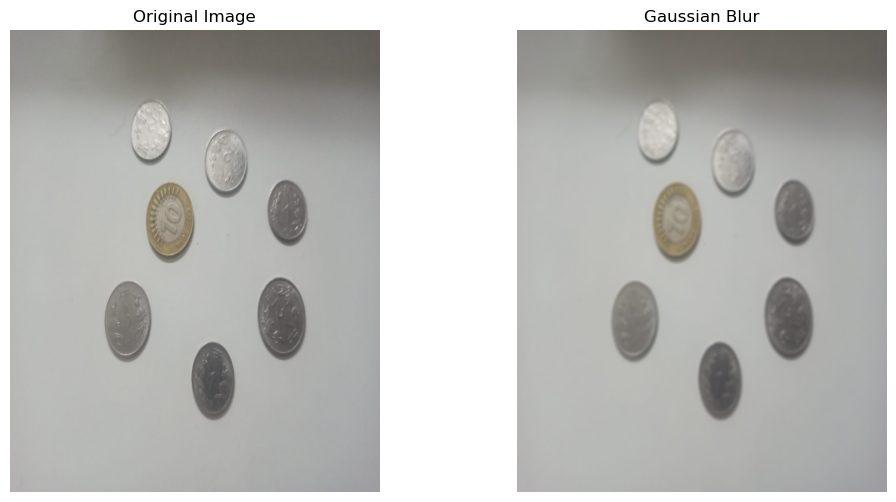

In [6]:
# Apply Gaussian blur
img_blur = cv2.GaussianBlur(img, (7, 7), 10)
show_images([cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB)], 
            ["Original Image", "Gaussian Blur"])

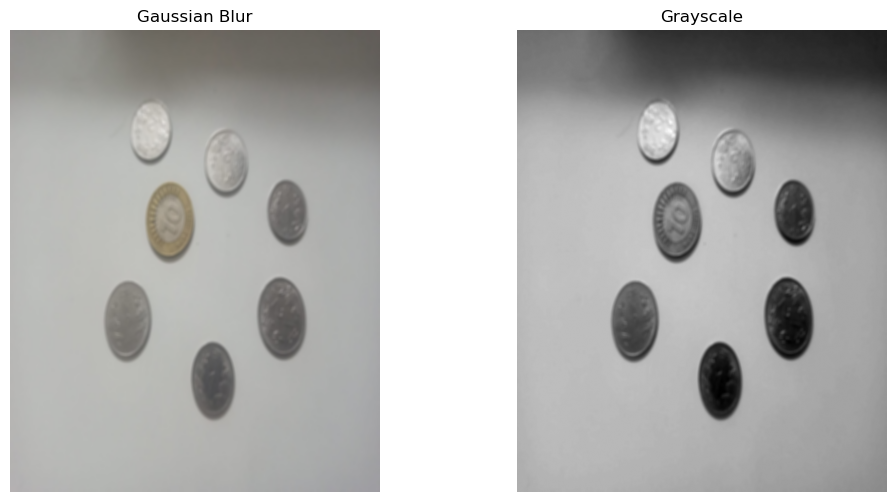

In [7]:
# Convert to grayscale
gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
show_images([cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB), gray], 
            ["Gaussian Blur", "Grayscale"])

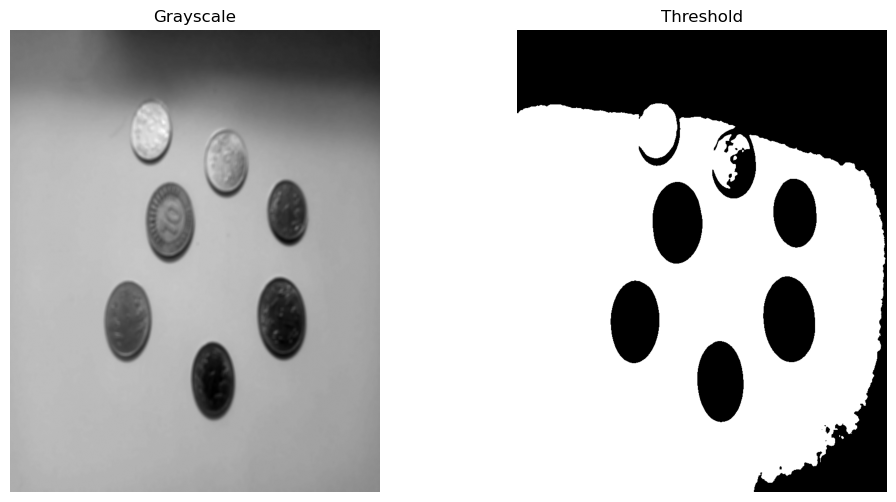

In [8]:
# Apply threshold
ret, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
show_images([gray, thresh], 
            ["Grayscale", "Threshold"],
            "threshold_no_contours.png")

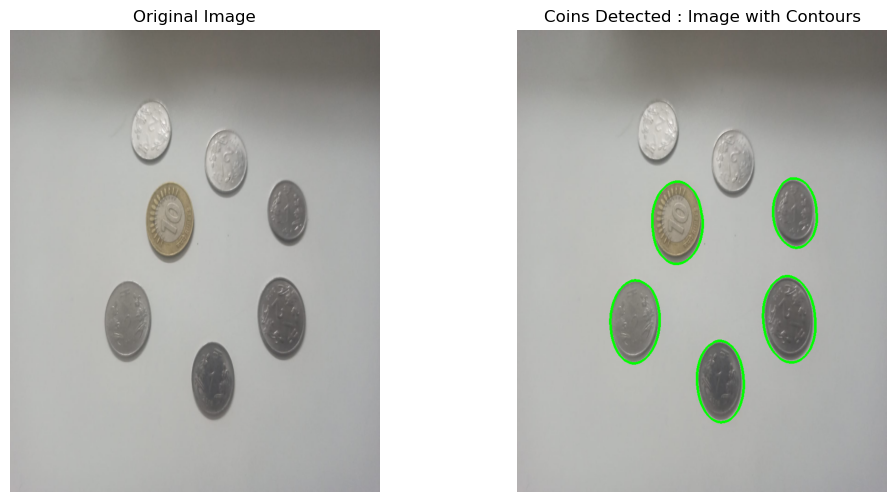

In [9]:
# Find contours
thresh_copy = thresh.copy()
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
area = {}
for i in range(len(contours)):
    cnt = contours[i]
    ar = cv2.contourArea(cnt)
    area[i] = ar
srt = sorted(area.items(), key=lambda x: x[1], reverse=True)
results = np.array(srt).astype("int")
num = np.argwhere(results[:, 1] > 500).shape[0]

# Draw contours
for i in range(1, num):
    image_copy = cv2.drawContours(image_copy, contours, results[i, 0], (0, 255, 0), 3)

# Show final image with contours
show_images([cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)], 
            ["Original Image", "Coins Detected : Image with Contours"],
            "detect_not_working.png"
            )


# B. Segmented Region of Each Coin

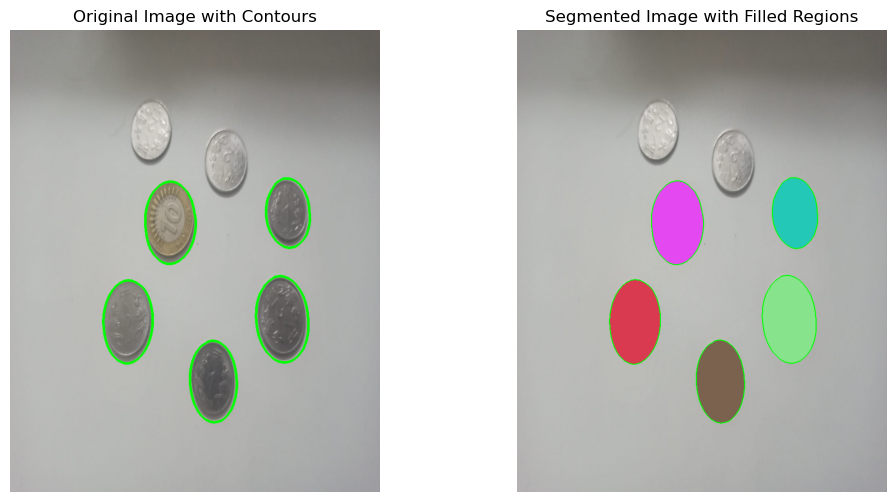

In [10]:
# Compute the area of each contour
area = {}
for i in range(len(contours)):
    cnt = contours[i]
    ar = cv2.contourArea(cnt)
    area[i] = ar

# Sort contours by area in descending order
srt = sorted(area.items(), key=lambda x: x[1], reverse=True)
results = np.array(srt).astype("int")
num = np.argwhere(results[:, 1] > 500).shape[0]

# Draw filled contours with unique colors
segmented_image = image_copy.copy()
colors = [(np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for _ in range(num)]

for i in range(1, num):
    cv2.drawContours(segmented_image, contours, results[i, 0], colors[i], cv2.FILLED)

# Show final image with filled contours
show_images([cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB), cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)], 
            ["Original Image with Contours", "Segmented Image with Filled Regions"],
            "segmented_coins.png")

# C. Count Total Coins

In [11]:
def count_coin(img):
    image_copy = img.copy()
    img_blur = cv2.GaussianBlur(img, (7, 7), 10)
    gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # Calculate the area of each contour
    area = {}
    for i in range(len(contours)):
        cnt = contours[i]
        ar = cv2.contourArea(cnt)
        area[i] = ar

    # Sort contours by area in descending order
    srt = sorted(area.items(), key=lambda x: x[1], reverse=True)
    results = np.array(srt).astype("int")

    # Count the number of contours with an area greater than 500
    num = np.argwhere(results[:, 1] > 500).shape[0]

    # Draw contours with green color on the copied image
    for i in range(1, num):
        image_copy = cv2.drawContours(image_copy, contours, results[i, 0], (0, 255, 0), 3)

    # Print the number of coins
    print("Number of coins is", num - 1)

# Example usage
count_coin(img)

Number of coins is 5
